In [2]:
import pandas as pd
train_data = pd.read_csv(r'C:\Users\DELL\Desktop\ml\kaggle\train.csv')
test_data = pd.read_csv(r'C:\Users\DELL\Desktop\ml\kaggle\test.csv')
train_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [3]:
test_data.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


In [4]:
train_data.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [5]:
print(train_data.dtypes)

id                 int64
day                int64
pressure         float64
maxtemp          float64
temparature      float64
mintemp          float64
dewpoint         float64
humidity         float64
cloud            float64
sunshine         float64
winddirection    float64
windspeed        float64
rainfall           int64
dtype: object


In [7]:
train_data.shape

(2190, 13)

In [6]:
train_data['winddirection'].unique()

array([ 60. ,  50. ,  70. ,  40. ,  20. ,  30. ,  80. ,  90. , 220. ,
       100. , 290. , 170. , 200. , 230. , 240. , 130. , 270. , 120. ,
       190. , 210. , 110. , 160. ,  10. , 180. , 280. , 250. , 300. ,
       260. ,  25. ,  75. , 150. , 140. ,  15. , 250.3,  65. ])

In [8]:

train_data.drop(columns=["id"], inplace=True)
print(train_data)


      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0       1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1       2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2       3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3       4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4       5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   
...   ...       ...      ...          ...      ...       ...       ...    ...   
2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   88.0   
2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   88.0   
2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   79.0   
2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   93.0   
2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   88.0   

      sunshine  winddirecti

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            2190 non-null   int64  
 1   pressure       2190 non-null   float64
 2   maxtemp        2190 non-null   float64
 3   temparature    2190 non-null   float64
 4   mintemp        2190 non-null   float64
 5   dewpoint       2190 non-null   float64
 6   humidity       2190 non-null   float64
 7   cloud          2190 non-null   float64
 8   sunshine       2190 non-null   float64
 9   winddirection  2190 non-null   float64
 10  windspeed      2190 non-null   float64
 11  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 205.4 KB


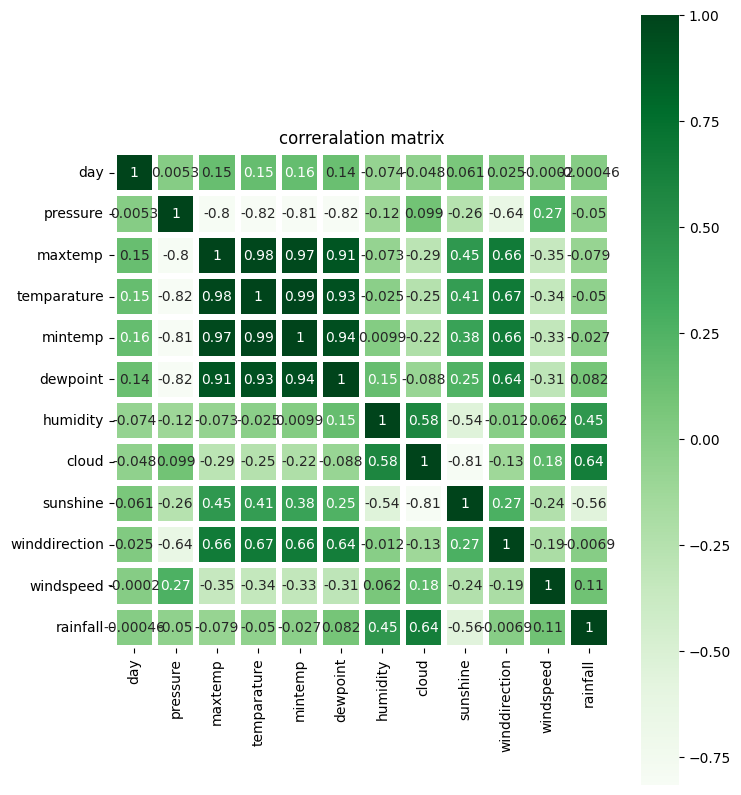

In [10]:
corr=train_data.corr()
corr.shape
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,10))
sns.heatmap(corr,annot=True,square=True,cmap='Greens',linewidths=3)
plt.title("correralation matrix")
plt.show()


In [11]:
train_data.shape

(2190, 12)

In [12]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [13]:
feature_names = ['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 
                 'humidity', 'cloud', 'sunshine', 'windspeed', 'winddirection', 'day']

train_data["temp_range"] = train_data["maxtemp"] - train_data["mintemp"]
train_data["humidity_cloud_ratio"] = train_data["humidity"] / (train_data["cloud"] + 1)

test_data["temp_range"] = test_data["maxtemp"] - test_data["mintemp"]
test_data["humidity_cloud_ratio"] = test_data["humidity"] / (test_data["cloud"] + 1)

In [14]:
final_features = feature_names + ['temp_range', 'humidity_cloud_ratio']

In [15]:
print(train_data)

      day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  cloud  \
0       1    1017.4     21.2         20.6     19.9      19.4      87.0   88.0   
1       2    1019.5     16.2         16.9     15.8      15.4      95.0   91.0   
2       3    1024.1     19.4         16.1     14.6       9.3      75.0   47.0   
3       4    1013.4     18.1         17.8     16.9      16.8      95.0   95.0   
4       5    1021.8     21.3         18.4     15.2       9.6      52.0   45.0   
...   ...       ...      ...          ...      ...       ...       ...    ...   
2185  361    1014.6     23.2         20.6     19.1      19.9      97.0   88.0   
2186  362    1012.4     17.2         17.3     16.3      15.3      91.0   88.0   
2187  363    1013.3     19.0         16.3     14.3      12.6      79.0   79.0   
2188  364    1022.3     16.4         15.2     13.8      14.7      92.0   93.0   
2189  365    1013.8     21.2         19.1     18.0      18.0      89.0   88.0   

      sunshine  winddirecti

In [16]:
X = train_data[final_features]
y = train_data["rainfall"]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
x_train = pd.DataFrame(x_train, columns=final_features)
x_test = pd.DataFrame(x_test, columns=final_features)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier

ensemble = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)),
    ('lr', LogisticRegression())
], voting='soft')

ensemble.fit(x_train_resampled, y_train_resampled)
y_pred_ensemble = ensemble.predict(x_test)
print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))


Ensemble Accuracy: 0.8447488584474886
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       119
           1       0.88      0.91      0.90       319

    accuracy                           0.84       438
   macro avg       0.81      0.79      0.80       438
weighted avg       0.84      0.84      0.84       438



In [21]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

In [22]:
# 5-fold cross-validation
from sklearn.model_selection import KFold ,cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.87242026 0.91557223 0.90413534 0.88909774 0.90413534]
Mean accuracy: 0.8970721832724401


In [23]:
model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=42)

In [24]:
# test data
test_data.fillna(method='ffill', inplace=True) 
X_test_final = test_data[final_features]  
X_test_final_scaled = scaler.transform(X_test_final)  


C:\Users\DELL\AppData\Local\Temp\ipykernel_10432\1265601071.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_data.fillna(method='ffill', inplace=True)


In [30]:
predictions = model.predict(X_test_final_scaled)

test_data["predicted_rainfall"] = predictions
print(predictions)

[1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
print(test_data["predicted_rainfall"].value_counts())


predicted_rainfall
1    540
0    190
Name: count, dtype: int64


In [32]:

submission = test_data[['id']] 
submission["predicted_rainfall"] = predictions 

submission.to_csv("submission.csv", index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


C:\Users\DELL\AppData\Local\Temp\ipykernel_10432\701835305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["predicted_rainfall"] = predictions
